# A Job outcomes project

We will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by **American Community Survey**, which conducts surveys and aggregates the data. The cleaned version of the dataset is done by FiveThirtyEight.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.

Here are some of the columns in the dataset:

|Columns               |                Description|
|----------------------|---------------------------|
|`Rank`                  |Rank by median earing|
|`Major_code`|Major code|
|`Major`|Major description|
|`Major_category`|Category of major|
|`Total`|Total number of people with major|
|`Sample_size`|Sample size (unweighted) of full-time|
|`Men`|Male graduates|
|`Women`|Female graduates|
|`Sharewomen`|Women as share of total|
|`Employed`|Number employed|
|`Median`|Median salary of full-time, year-round workers|
|`Low_wage_jobs`|Number in low-wage service jobs|
|`Full_time`|Number employed 35 hours or more|
|`Part-time`|Number employed less than 35 hours|

## Reading the dataset

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent_grads.csv')
first_row = recent_grads.iloc[0]
first_row

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [99]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419.0,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36.0,1976.0,...,270.0,1207.0,37.0,0.018381,110000.0,95000.0,125000.0,1534.0,364.0,193.0
1,2,2416.0,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7.0,640.0,...,170.0,388.0,85.0,0.117241,75000.0,55000.0,90000.0,350.0,257.0,50.0
2,3,2415.0,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3.0,648.0,...,133.0,340.0,16.0,0.024096,73000.0,50000.0,105000.0,456.0,176.0,0.0
3,4,2417.0,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16.0,758.0,...,150.0,692.0,40.0,0.050125,70000.0,43000.0,80000.0,529.0,102.0,0.0
4,5,2405.0,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289.0,25694.0,...,5180.0,16697.0,1672.0,0.061098,65000.0,50000.0,75000.0,18314.0,4440.0,972.0


In [100]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609.0,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47.0,6259.0,...,2190.0,3602.0,304.0,0.046320,26000.0,20000.0,39000.0,2771.0,2947.0,743.0
169,170,5201.0,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7.0,2125.0,...,572.0,1211.0,148.0,0.065112,25000.0,24000.0,34000.0,1488.0,615.0,82.0
170,171,5202.0,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13.0,2101.0,...,648.0,1293.0,368.0,0.149048,25000.0,25000.0,40000.0,986.0,870.0,622.0
171,172,5203.0,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21.0,3777.0,...,965.0,2738.0,214.0,0.053621,23400.0,19200.0,26000.0,2403.0,1245.0,308.0
172,173,3501.0,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2.0,742.0,...,237.0,410.0,87.0,0.104946,22000.0,20000.0,22000.0,288.0,338.0,192.0


In [101]:
recent_grads.describe()

,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,171.000000,170.000000,170.000000,170.000000,170.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,3862.017544,39806.488235,16906.052941,22900.435294,0.522585,359.847953,31534.871345,26313.573099,8930.637427,19908.005848,2443.415205,0.068398,40127.485380,29492.690058,51523.391813,12464.520468,13421.543860,3902.953216
std,1689.203117,63728.892660,28237.200116,41232.023707,0.230831,620.994383,50872.226512,43039.473942,14705.561797,33295.869478,4129.201251,0.030362,11527.925383,9181.001279,14984.958426,21383.878760,23895.012611,6973.699771
min,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,2402.500000,4670.750000,2352.750000,1878.750000,0.339959,43.500000,3815.500000,3197.000000,1053.500000,2537.500000,308.000000,0.050584,33000.000000,24000.000000,41500.000000,1788.000000,1593.000000,347.500000
50%,3607.000000,15191.000000,5667.000000,8604.000000,0.534024,132.000000,12266.000000,10099.000000,3366.000000,7460.000000,917.000000,0.067961,36000.000000,27000.000000,47000.000000,4545.000000,4612.000000,1246.000000
75%,5502.500000,39041.250000,15013.000000,22749.250000,0.701740,340.000000,31969.500000,25747.500000,10014.000000,18458.500000,2401.000000,0.087640,45000.000000,33000.000000,60000.000000,14747.500000,11800.500000,3526.000000
max,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


It seems to have missing values in the table. Matplotlib expects that columns of values we pass in have matching lengths and missing values will causes matplotlib to throw errors. We need to drop rows with missing values. 

In [102]:
#looking up the number of rows in dataset
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [103]:
#dropping row with missing values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

170

There are actually 3 rows with missing values removed.

## Pandas & Scatter Plots

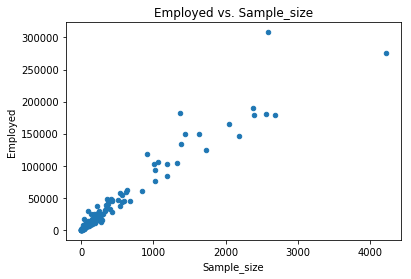

In [104]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size')

We can access the underlying malplotlib Axes object by assigning the return value to a variable

Text(0.5, 1.0, 'Employed vs. Sample_size')

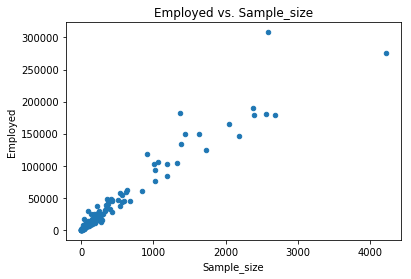

In [105]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

Generate scatter plots to explore the relations between

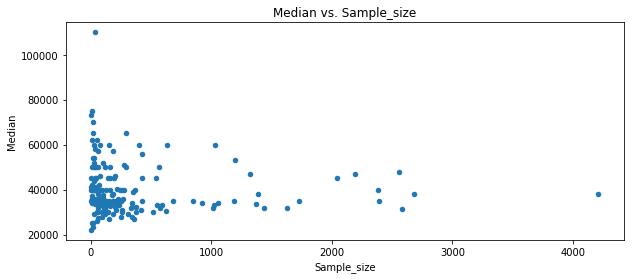

In [106]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title = 'Median vs. Sample_size', figsize = (10,4))

We can see that more popular majors, in general, make less money than unpopular ones. Students attending less popular majors can get from 40,000 to 80,000 dollars whereas students attending popular majors get only under 40,000 dollars/year.  

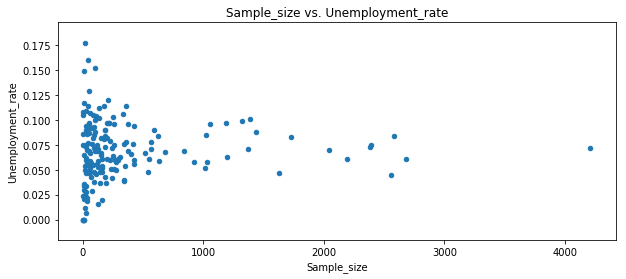

In [107]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title = 'Sample_size vs. Unemployment_rate', figsize = (10,4))

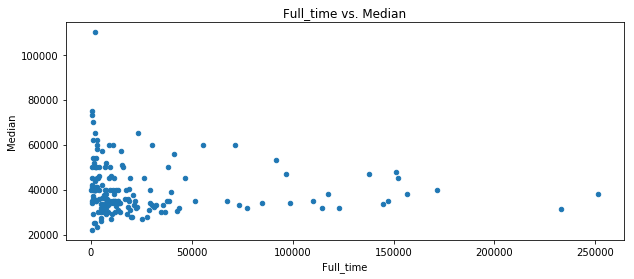

In [108]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title = 'Full_time vs. Median', figsize = (10,4))

We would say that in a major, the more people do full-time jobs, the less they earn their money. But many cases show that with the job where the number of full-time is under 50,000, the median salary concentrates between 20,000 and 45,000 dollars. 

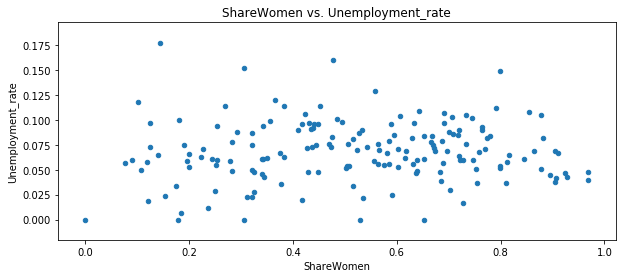

In [109]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title = 'ShareWomen vs. Unemployment_rate', figsize = (10,4))

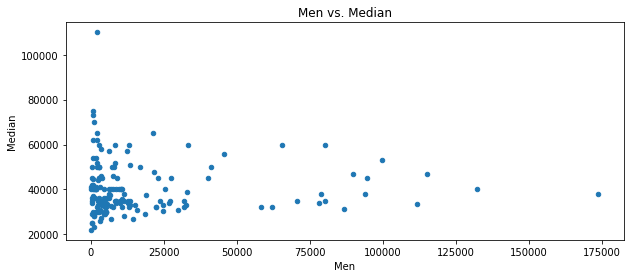

In [110]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title = 'Men vs. Median', figsize = (10,4))

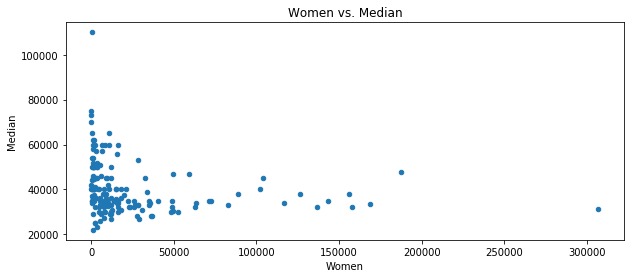

In [111]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title = 'Women vs. Median', figsize = (10,4))

We observe that students that majored in subjects that were majority female make less money. 

## Pandas, Histograms

Text(0.5, 1.0, 'Sample size of full-time')

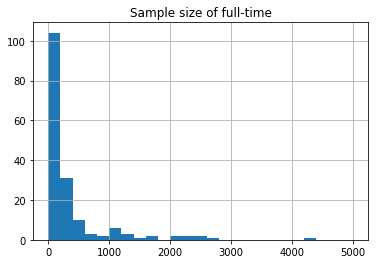

In [112]:
hist_sample = recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
hist_sample.set_title('Sample size of full-time')


Text(0.5, 1.0, 'Median salary')

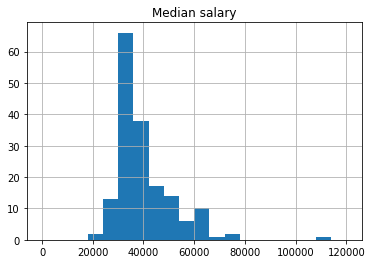

In [113]:
hist_median = recent_grads['Median'].hist(bins=20, range=(0,120000))
hist_median.set_title('Median salary')

The most common median salary range falls in between 30,000 and 50,000 dollars/year.

Text(0.5, 1.0, 'Number of full-time')

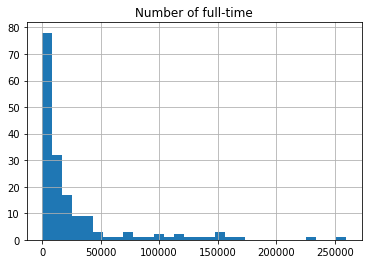

In [114]:
hist_ft = recent_grads['Full_time'].hist(bins=30, range=(0,260000))
hist_ft.set_title('Number of full-time')

Text(0.5, 1.0, 'Women as share of total')

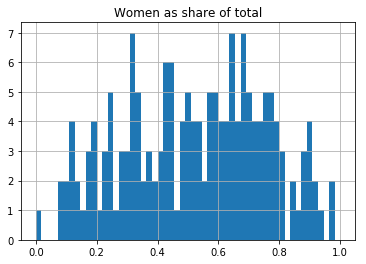

In [115]:
hist_sharew = recent_grads['ShareWomen'].hist(bins=55, range=(0,1))
hist_sharew.set_title('Women as share of total')

From this chart, we would say that about 25 % of majors are predominantly female. And the rest (75%) are predominantly male.

Text(0.5, 1.0, 'Unemployment rate')

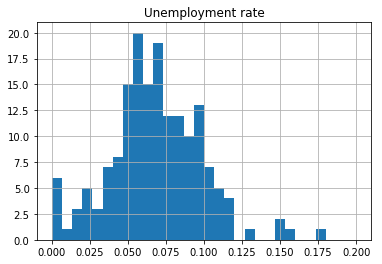

In [116]:
hist_unrate = recent_grads['Unemployment_rate'].hist(bins= 30, range=(0,0.20))
hist_unrate.set_title('Unemployment rate')

Text(0.5, 1.0, 'Men graduates')

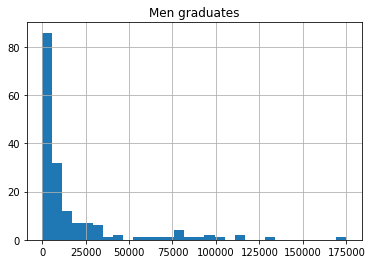

In [117]:
hist_men = recent_grads['Men'].hist(bins= 30, range=(0,175000))
hist_men.set_title('Men graduates')

Text(0.5, 1.0, 'Women graduates')

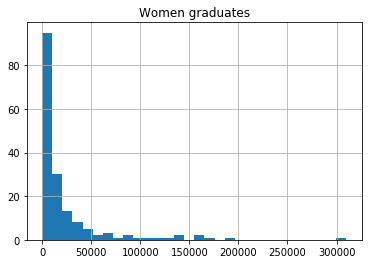

In [118]:
hist_women = recent_grads['Women'].hist(bins= 30, range=(0,310000))
hist_women.set_title('Women graduates')

## Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C94B1C50B8>,
      dtype=object)

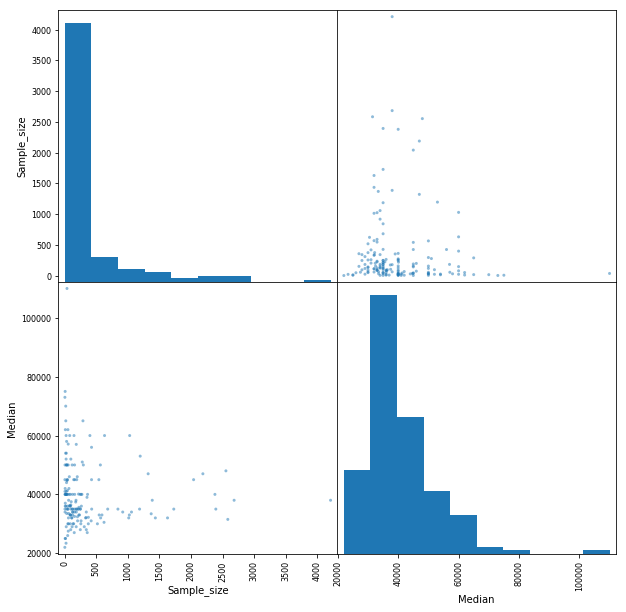

In [119]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']], figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C94B320668>,
      dtype=object)

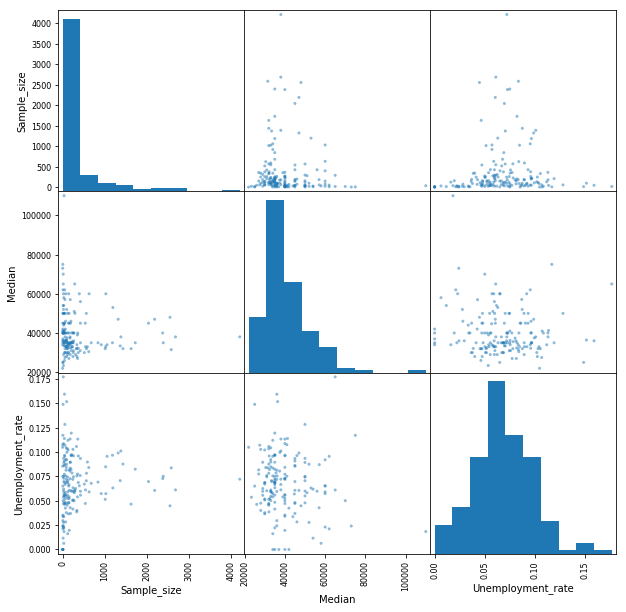

In [120]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize = (10,10))

## Pandas, Bar Plots

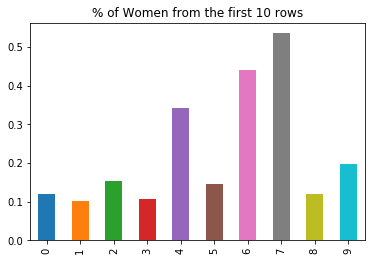

In [121]:
recent_grads[:10]['ShareWomen'].plot(kind='bar', title='% of Women from the first 10 rows')

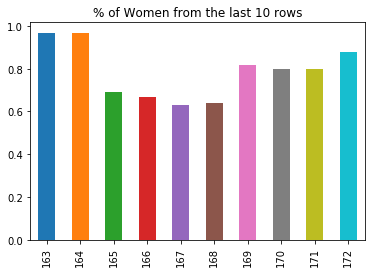

In [219]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar', title='% of Women from the last 10 rows')

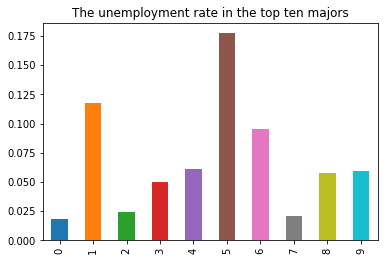

In [216]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar', title='The unemployment rate in the top ten majors')

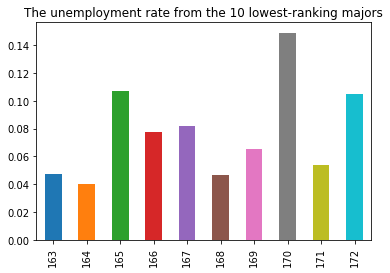

In [217]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar', title='The unemployment rate from the 10 lowest-ranking majors')

## The number of men with the number of women in each category of majors

In [125]:
categ_list = recent_grads['Major_category'].unique()
categ_list

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [146]:
#creating 2 dictionaries containing value counts of men and women in each category of majors
men_in_categ = {}
women_in_categ = {}

for category in categ_list:
    categ_only = recent_grads[recent_grads['Major_category'] == category]
    total_men = categ_only['Men'].sum()
    total_women = categ_only['Women'].sum()
    men_in_categ[category] = int(total_men)
    women_in_categ[category] = int(total_women)

print('Men dictionary:', men_in_categ )
print('\nWomen dictionary:', women_in_categ)

Men dictionary: {'Engineering': 408307, 'Business': 667852, 'Physical Sciences': 94862, 'Law & Public Policy': 91129, 'Computers & Mathematics': 208725, 'Industrial Arts & Consumer Services': 101912, 'Arts': 134390, 'Health': 75517, 'Social Science': 256834, 'Biology & Life Science': 184919, 'Education': 103526, 'Agriculture & Natural Resources': 40357, 'Humanities & Liberal Arts': 272846, 'Psychology & Social Work': 98115, 'Communications & Journalism': 131921, 'Interdisciplinary': 2817}

Women dictionary: {'Engineering': 129276, 'Business': 634524, 'Physical Sciences': 88501, 'Law & Public Policy': 87978, 'Computers & Mathematics': 90283, 'Industrial Arts & Consumer Services': 125445, 'Arts': 222740, 'Health': 387713, 'Social Science': 273132, 'Biology & Life Science': 268943, 'Education': 455603, 'Agriculture & Natural Resources': 35263, 'Humanities & Liberal Arts': 440622, 'Psychology & Social Work': 382892, 'Communications & Journalism': 260680, 'Interdisciplinary': 9479}


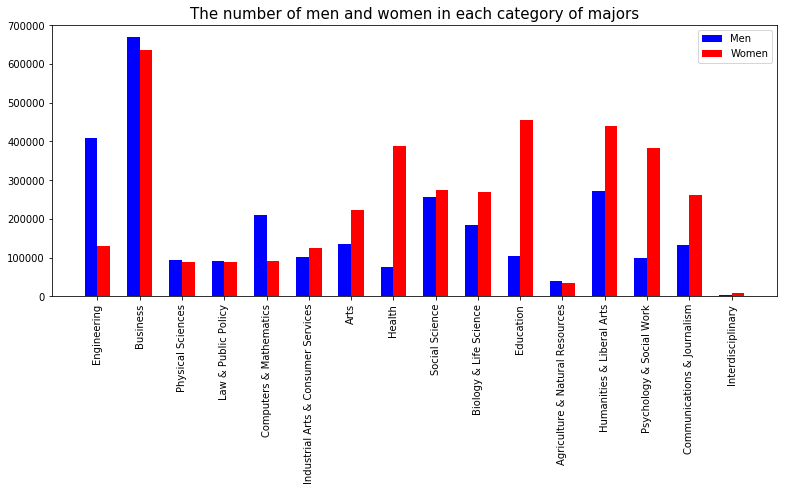

In [197]:
#creating comparison bar plot from 2 dictionaries
import numpy as np
X = np.arange(len(men_in_categ))
plt.figure(figsize=(13,5))
plt.bar(X-0.15, men_in_categ.values(), width=0.3, color='blue')
plt.bar(X+0.15, women_in_categ.values(), width=0.3, color='red')
plt.xticks(X, men_in_categ.keys(), rotation=90)
plt.legend(('Men', 'Women'))
plt.title('The number of men and women in each category of majors', fontsize=15)
plt.show()

*Observation:* Men hold majority part in science major, especially in engineering, business, computers and mathematics. In a meanwhile, women move ahead in social, art and healtcare section. There is a light balance between men and women in law, physical sciences and agriculture. 

## Distribution of median salaries and unemployment rate

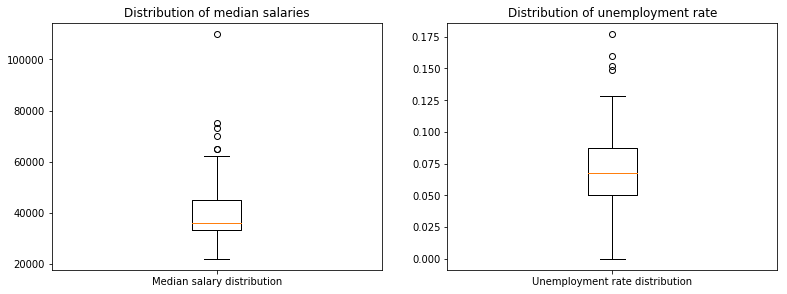

In [215]:
fig = plt.figure(figsize=(13,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.boxplot(recent_grads['Median'])
ax1.set_xticklabels(['Median salary distribution'])
ax1.set_title('Distribution of median salaries')

ax2.boxplot(recent_grads['Unemployment_rate'])
ax2.set_xticklabels(['Unemployment rate distribution'])
ax2.set_title('Distribution of unemployment rate')

plt.show()